In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def read_df(df_name):
    features=['To_go','Age','Workclass','Final_Weight','Education','Education_Num','Marital_Status','Occupation','Relationship',
         'Race','Sex','Capital_Gain','Capital_Loss','Hours_per_Week','Native_Country','Class'
         ]
    df=pd.read_csv(df_name,names=features, header=None,na_values=' ?')
    df.drop('To_go',axis=1,inplace=True)
    return df

In [3]:
df_test=read_df('test-project.data')

In [4]:
df_test.head()

,Age,Workclass,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,33,Private,182423,HS-grad,9,Divorced,Other-service,Unmarried,Black,Male,0,0,40,United-States,<=50K
2,32,Private,178623,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Female,0,0,40,NaN,<=50K
3,39,Private,108540,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
4,51,Private,21698,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K


Text(0.5, 1.0, 'Test Data Visualisation')

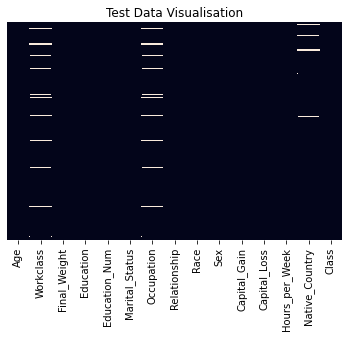

In [5]:
Test_Data_Vis=sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False)
Test_Data_Vis.set_title('Test Data Visualisation')

In [8]:
df_test_na=df_test[df_test.isnull().any(1)]
print(f"Number of rows that contain null values for Test Data set {df_test_na.shape[0]}")
print(f"Percentage of null values in Test dataset {round((df_test_na.shape[0]/df_test.shape[0])*100,2)} %")

Number of rows that contain null values for Test Data set 921
Percentage of null values in Test dataset 7.33 %


<AxesSubplot:>

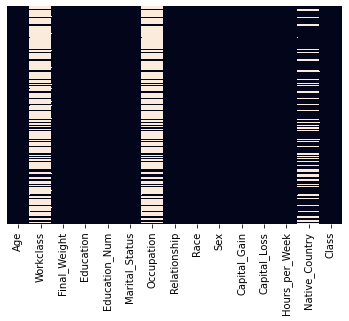

In [7]:
sns.heatmap(df_test_na.isnull(),yticklabels=False,cbar=False)

In [9]:
df_test_2=df_test.dropna()

Text(0.5, 1.0, 'Test Data Visualisation after removing Nulls')

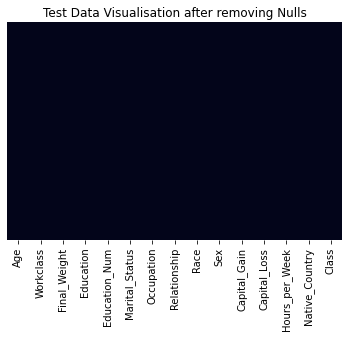

In [10]:
Test_Data_Vis_2=sns.heatmap(df_test_2.isnull(),yticklabels=False,cbar=False)
Test_Data_Vis_2.set_title('Test Data Visualisation after removing Nulls')

In [11]:
print(f"Number of rows for Test Data set after removing nulls {df_test_2.shape[0]}")

Number of rows for Test Data set after removing nulls 11640


In [12]:
#The whole methodology above was summarized in a function
def inbalances_check(df,data_name):
    df_class=df['Class']
    Class_0=df_class[df_class==' <=50K']
    Class_1=df_class[df_class==' >50K']
    print(f"Number of Observations Below 50K for {data_name} Dataset {Class_0.shape[0]} Percentage: {round((Class_0.shape[0]/df_class.shape[0])*100,2)} %")
    print(f"Number of Observations Above 50K for {data_name} Dataset {Class_1.shape[0]} Percentage: {round((Class_1.shape[0]/df_class.shape[0])*100,2)} %")
    return Class_0.shape[0],Class_1.shape[0]

In [13]:
Class_0_test,Class_1_test=inbalances_check(df_test_2,'Test')

Number of Observations Below 50K for Test Dataset 8760 Percentage: 75.26 %
Number of Observations Above 50K for Test Dataset 2880 Percentage: 24.74 %


In [14]:
df_test_2.head()

,Age,Workclass,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,33,Private,182423,HS-grad,9,Divorced,Other-service,Unmarried,Black,Male,0,0,40,United-States,<=50K
3,39,Private,108540,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
4,51,Private,21698,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
7,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [15]:
#Number of labels per categorical column
categorical_col=['Workclass','Education','Marital_Status','Occupation','Relationship','Race','Native_Country']
for cat in categorical_col:
    print(f"{cat}, {len(df_test_2[cat].unique())} labels")

Workclass, 7 labels
Education, 16 labels
Marital_Status, 7 labels
Occupation, 14 labels
Relationship, 6 labels
Race, 5 labels
Native_Country, 40 labels


In [16]:
ohe_df_test=pd.get_dummies(df_test_2)

In [17]:
print(f"df shape before One hot encoding: {df_test_2.shape}")
print(f"df shape after One hot encoding: {ohe_df_test.shape}")

df shape before One hot encoding: (11640, 15)
df shape after One hot encoding: (11640, 105)


In [19]:
ohe_df_test.head()

,Age,Final_Weight,Education_Num,Capital_Gain,Capital_Loss,Hours_per_Week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native_Country_ Scotland,Native_Country_ South,Native_Country_ Taiwan,Native_Country_ Thailand,Native_Country_ Trinadad&Tobago,Native_Country_ United-States,Native_Country_ Vietnam,Native_Country_ Yugoslavia,Class_ <=50K,Class_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,33,182423,9,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,39,108540,9,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,51,21698,9,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
7,42,159449,13,5178,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [25]:
#These are the columns that were left after preprocessing for the Train Dataset
#In order for this analysis to be meaningful both Train and Test Datasets 
#Need to have exactly the same columns as a results we kept the only the columns from the Train dataset 
final_cols=['Age', 'Final_Weight', 'Education_Num', 'Capital_Gain', 'Capital_Loss',
       'Hours_per_Week', 'Workclass_ Private', 'Education_ Assoc-acdm',
       'Education_ Assoc-voc', 'Education_ Bachelors', 'Education_ Doctorate',
       'Education_ HS-grad', 'Education_ Masters', 'Education_ Some-college',
       'Marital_Status_ Married-civ-spouse', 'Occupation_ Adm-clerical',
       'Occupation_ Craft-repair', 'Occupation_ Exec-managerial',
       'Occupation_ Machine-op-inspct', 'Occupation_ Other-service',
       'Occupation_ Prof-specialty', 'Occupation_ Sales',
       'Occupation_ Transport-moving', 'Relationship_ Husband',
       'Relationship_ Not-in-family', 'Relationship_ Other-relative',
       'Relationship_ Own-child', 'Relationship_ Unmarried',
       'Relationship_ Wife', 'Race_ White', 'Sex_ Male',
       'Native_Country_ United-States', 'Class_ >50K']

In [23]:
final_df_test=ohe_df_test[final_cols]

In [26]:
final_df_test.head()

,Age,Final_Weight,Education_Num,Capital_Gain,Capital_Loss,Hours_per_Week,Workclass_ Private,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,...,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ White,Sex_ Male,Native_Country_ United-States,Class_ >50K
0,39,77516,13,2174,0,40,0,0,0,1,...,0,1,0,0,0,0,1,1,1,0
1,33,182423,9,0,0,40,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,39,108540,9,0,0,40,1,0,0,0,...,1,0,0,0,0,0,1,1,1,0
4,51,21698,9,0,0,40,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
7,42,159449,13,5178,0,40,1,0,0,1,...,1,0,0,0,0,0,1,1,1,1


In [30]:
print(final_df_test.columns==final_cols)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]


In [32]:
final_df_test.shape

(11640, 33)

In [34]:
#Splitting the categorical from the numerical columns to perform Standard Scaler only on the numerical
df_test_num=final_df_test[list(final_df_test.columns[:6])]
df_test_cat=final_df_test[list(final_df_test.columns[6:])]

In [35]:
df_test_num.head()

,Age,Final_Weight,Education_Num,Capital_Gain,Capital_Loss,Hours_per_Week
0,39,77516,13,2174,0,40
1,33,182423,9,0,0,40
3,39,108540,9,0,0,40
4,51,21698,9,0,0,40
7,42,159449,13,5178,0,40


In [36]:
df_test_cat.head()

,Workclass_ Private,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Some-college,Marital_Status_ Married-civ-spouse,Occupation_ Adm-clerical,...,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ White,Sex_ Male,Native_Country_ United-States,Class_ >50K
0,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,1,1,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,1,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,1,1,0
4,1,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
7,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,1,1,1


In [37]:
# normalizing Dataset
df_test_num=df_test_num.apply(lambda x: (x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0)))

In [38]:
df_test_num.head()

,Age,Final_Weight,Education_Num,Capital_Gain,Capital_Loss,Hours_per_Week
0,0.301370,0.047138,0.800000,0.021740,0.0,0.397959
1,0.219178,0.124712,0.533333,0.000000,0.0,0.397959
3,0.301370,0.070079,0.533333,0.000000,0.0,0.397959
4,0.465753,0.005863,0.533333,0.000000,0.0,0.397959
7,0.342466,0.107724,0.800000,0.051781,0.0,0.397959


In [40]:
final_test_df=pd.concat([df_test_num,df_test_cat],axis=1)

In [41]:
final_test_df.head()

,Age,Final_Weight,Education_Num,Capital_Gain,Capital_Loss,Hours_per_Week,Workclass_ Private,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,...,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ White,Sex_ Male,Native_Country_ United-States,Class_ >50K
0,0.301370,0.047138,0.800000,0.021740,0.0,0.397959,0,0,0,1,...,0,1,0,0,0,0,1,1,1,0
1,0.219178,0.124712,0.533333,0.000000,0.0,0.397959,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,0.301370,0.070079,0.533333,0.000000,0.0,0.397959,1,0,0,0,...,1,0,0,0,0,0,1,1,1,0
4,0.465753,0.005863,0.533333,0.000000,0.0,0.397959,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
7,0.342466,0.107724,0.800000,0.051781,0.0,0.397959,1,0,0,1,...,1,0,0,0,0,0,1,1,1,1


In [42]:
final_test_df.to_csv('Processed_Test_Data.csv',index=False)